<a href="https://colab.research.google.com/github/gajanankumar/Regression_Capstone_Project/blob/branch2/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


## <b> Data Information </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>
Dataset contains 8760 rows and 14 columns 

### <b>Attribute Information: </b>

* ### Date : year-month-day(object)
* ### Rented Bike count - Count of bikes rented at each hour(Integer)
* ### Hour - Hour of he day(Integer)
* ### Temperature-Temperature in Celsius(Numeric)
* ### Humidity - %(Integer)
* ### Windspeed - m/s(Numeric)
* ### Visibility - 10m (Integer)
* ### Dew point temperature - Celsius (Numeric)
* ### Solar radiation - MJ/m2(Numeric)
* ### Rainfall - mm(Numeric)
* ### Snowfall - cm(Numeric)
* ### Seasons - Winter, Spring, Summer, Autumn(object)
* ### Holiday - Holiday/No holiday(object)
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)(object)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from numpy import math

import warnings
warnings.filterwarnings('ignore')

**Importing dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
dataset=pd.read_csv('/content/drive/MyDrive/mlprojects/SeoulBikeData.csv',encoding='cp1252')

### Exploring Data

In [4]:
#Getting first 5 records from dataset
dataset.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
dataset.tail() # fetching last 5 rows

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
dataset.info() # Getting information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

From above infomation we conclude that dataset contains 14 columns and 8760 records. it contains all records non null.

In [9]:
dataset.describe() # getting statistical summary about numerical features

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [10]:
dataset.describe(include='all') # getting statistical summary including all features

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


**checking duplicate values**

In [11]:
#chcking duplicate records in dataset
len(dataset[dataset.duplicated()])

0

**Checking for null values**

In [12]:
dataset.isna().sum() # checking missing values in dataset

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [13]:
# checking unique values 
dataset.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

**From above result we conclude that here in this dataset no missing values and not any duplicated records present.**

In [14]:
dataset.columns # checking features names

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [15]:
# Renaming columns for convinence 
dataset=dataset.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity',
                      'Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature',
                      'Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall',
                      'Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

In [16]:
dataset.columns # checking features names

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [18]:
dataset['Seasons'].value_counts() # checking seasons value counts

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [19]:
dataset['Functioning_Day'].value_counts() # checking Functioning_Day value counts

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [20]:
dataset['Holiday'].value_counts()  # checking Holiday value counts

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

##Exploratory data analysys

In [22]:
dataset.columns # checking columns in dataset

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [23]:
dataset.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [24]:
# Changing date feature datatype to datetime

dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date'].dtype

dtype('<M8[ns]')

In [25]:
dataset['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [26]:
# making new columns in dataframe from date column
dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month

dataset['day'] = dataset['Date'].dt.day_name()

In [27]:
dataset['day']

0       Thursday
1       Thursday
2       Thursday
3       Thursday
4       Thursday
          ...   
8755      Friday
8756      Friday
8757      Friday
8758      Friday
8759      Friday
Name: day, Length: 8760, dtype: object

In [28]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
dataset['weekday_weekend']=dataset['day'].apply(lambda x : "weekend" if x=='Saturday' or x=='Sunday' else "weekday" )

In [29]:
# checking no of weekdays and weekends
dataset['weekday_weekend'].value_counts()

weekday    6216
weekend    2544
Name: weekday_weekend, dtype: int64

In [30]:
#Change the int64 column into catagory column
cols=['Hour','month','weekday_weekend']
for col in cols:
  dataset[col]=dataset[col].astype('category')

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   category      
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

we convert the "date" column into 3 different column i.e "year","month","day". The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it. The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.

In [32]:
# Droping unnecessary columns.
# Year basically contains details from 2017 december to 2018 november so we considers this is one year.

dataset=dataset.drop(columns=['Date','day','year'],axis=1)

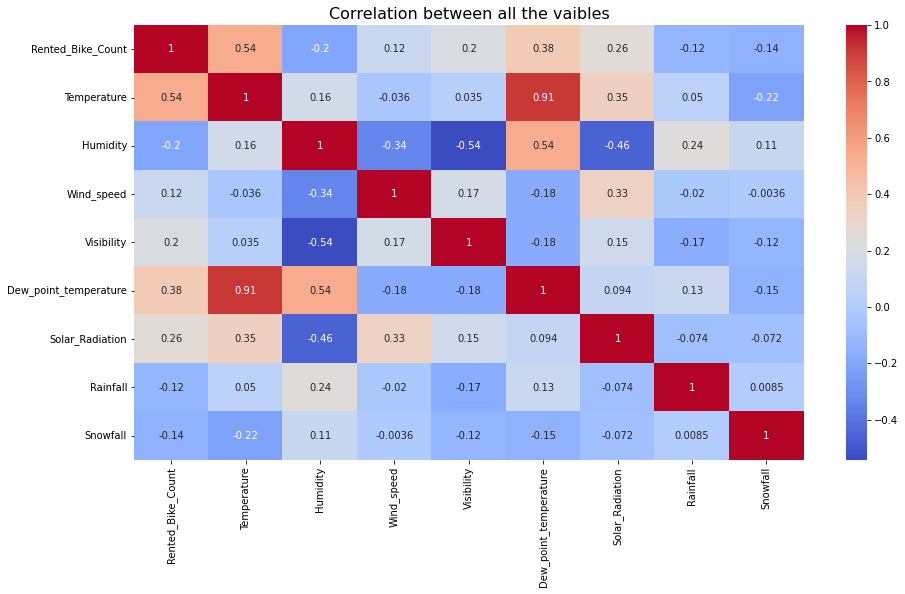

In [33]:
#Heatmap for co-relation in features
plt.figure(figsize=(15, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

### Obeservations:
##### Dew point temperature and temperature are highly related.
###### Humidity has low correlation with visibility due to solar radiation.

In [34]:
# Numerical features 

num_features = list(set(dataset.describe()))
num_features 

['Solar_Radiation',
 'Snowfall',
 'Dew_point_temperature',
 'Rainfall',
 'Temperature',
 'Wind_speed',
 'Visibility',
 'Rented_Bike_Count',
 'Humidity']

**Multicolinearity check**

In [35]:
# function to calculate Multicollinearity

# checking the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
dataset_m=dataset[num_features]

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = num_features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataset_m.values, i) for i in range(len(num_features))]
vif_data['VIF'] = round(vif_data['VIF'],2)


print(vif_data)

                 feature    VIF
0        Solar_Radiation   2.89
1               Snowfall   1.12
2  Dew_point_temperature  16.04
3               Rainfall   1.10
4            Temperature  34.56
5             Wind_speed   4.57
6             Visibility   9.06
7      Rented_Bike_Count   3.62
8               Humidity   5.09


**Here VIF for  Dew_point_temperature and Temperature greater than 10 so need to drop one of them.**

In [36]:
# Droping highly correlated features for eleminating Multico-linearity
dataset=dataset.drop(['Dew_point_temperature'],axis=1)

###**Univariate Analysis :**

In [37]:
# cateogrical feature 

cat_features = list(set(dataset.describe(include = 'all')) - set(dataset.describe()))
cat_features

['Hour', 'Functioning_Day', 'Holiday', 'Seasons', 'weekday_weekend', 'month']

In [38]:
# Numerical features 

num_features = list(set(dataset.describe()))
num_features 

['Solar_Radiation',
 'Snowfall',
 'Rainfall',
 'Temperature',
 'Wind_speed',
 'Visibility',
 'Rented_Bike_Count',
 'Humidity']

In [39]:
# function to calculate Multicollinearity

# checking the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
dataset_m=dataset[num_features]

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = num_features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataset_m.values, i) for i in range(len(num_features))]
vif_data['VIF'] = round(vif_data['VIF'],2)


print(vif_data)

             feature   VIF
0    Solar_Radiation  2.25
1           Snowfall  1.12
2           Rainfall  1.10
3        Temperature  4.42
4         Wind_speed  4.21
5         Visibility  4.71
6  Rented_Bike_Count  3.43
7           Humidity  4.83


**Checking Skewness in features**

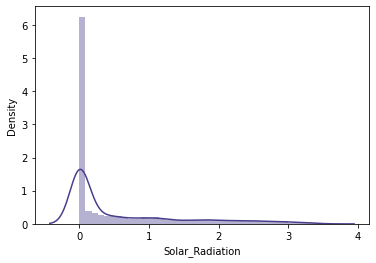

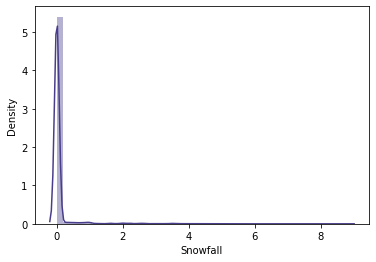

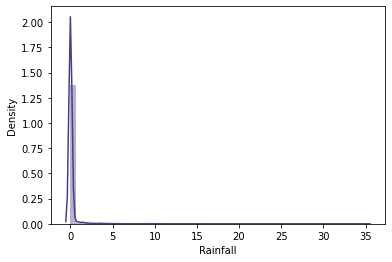

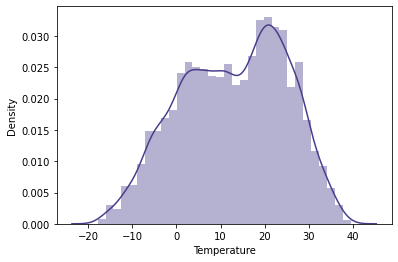

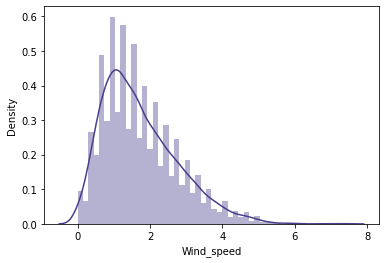

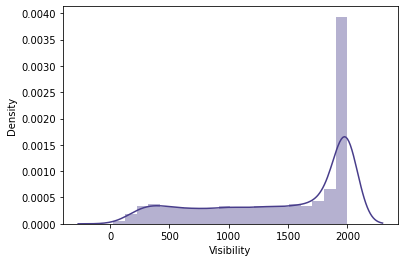

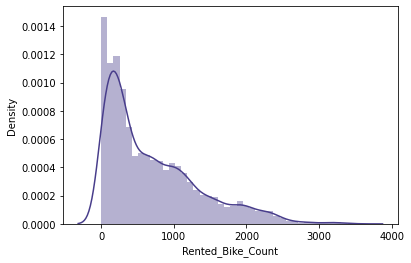

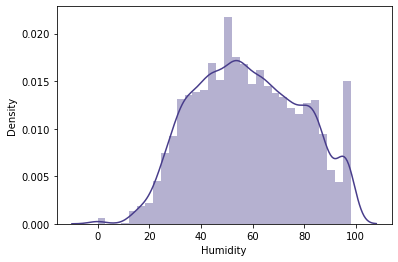

In [40]:
#plotting distplots to analyze the distribution of all numerical features
for feat in num_features:
  plt.figure(figsize=(6,4))
  sns.distplot(x=dataset[feat],color= 'darkslateblue')
  plt.xlabel(feat)
plt.show()

**From above plot we conclude that for some fetures distributions are rightly skewed and for some leftly skewed.**

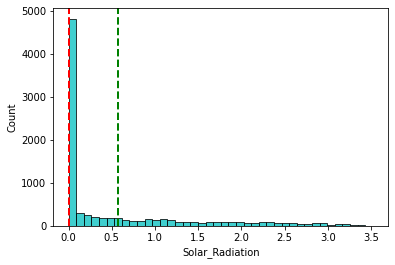

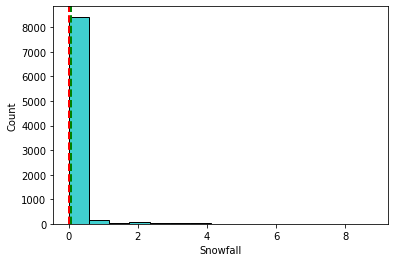

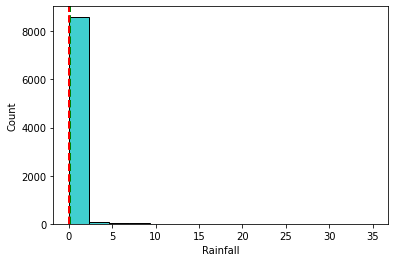

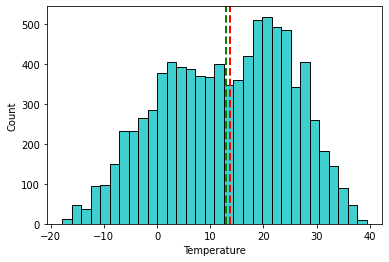

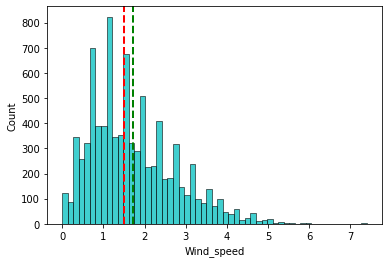

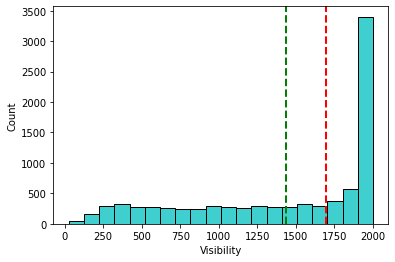

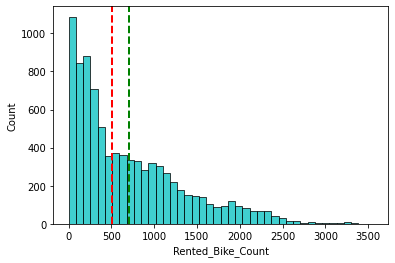

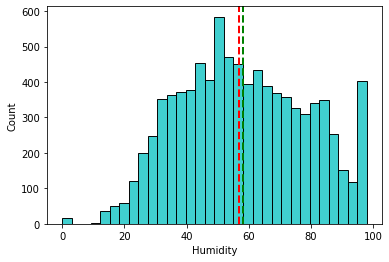

In [41]:
#plotting histogram with mean and median

for col in num_features:
  sns.histplot(dataset[col],color= 'c')
  plt.axvline(dataset[col].mean(), color='g', linestyle='dashed', linewidth=2)
  plt.axvline(dataset[col].median(), color='red', linestyle='dashed', linewidth=2)   
  plt.show()

**The features which are skewed, their mean and the median are also skewed.**
**Rented_bike_count is right skewed.**

**Outliers Detection using Box plot**

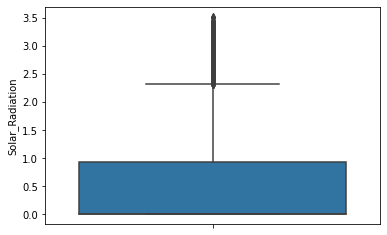

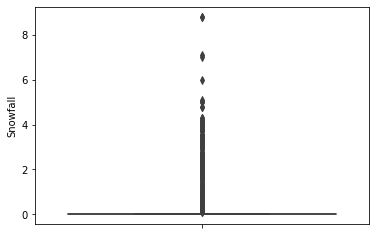

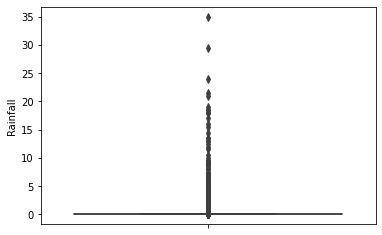

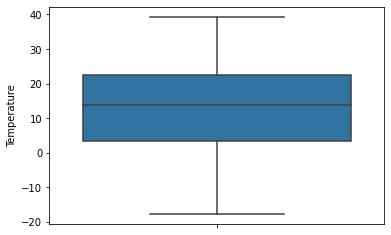

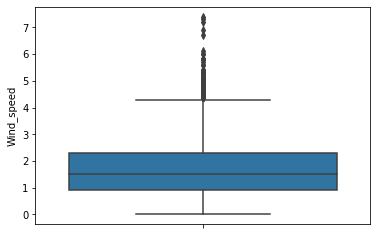

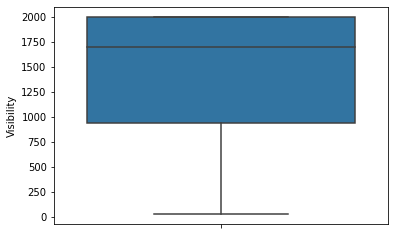

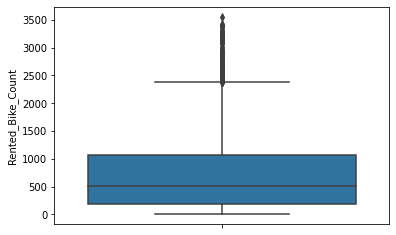

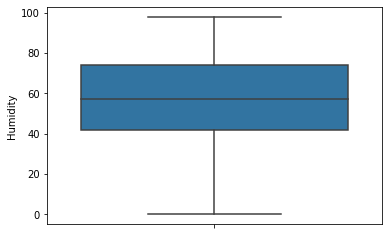

In [42]:
# Numerical features plotting Box plot
for nfet in num_features:
    sns.boxplot(y = dataset[nfet])
    plt.show()

In [43]:
dataset.isna().sum()

Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_Day      0
month                0
weekday_weekend      0
dtype: int64

In [44]:
# finding the inter-quartile range 

Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented_Bike_Count     874.25
Temperature            19.00
Humidity               32.00
Wind_speed              1.40
Visibility           1060.00
Solar_Radiation         0.93
Rainfall                0.00
Snowfall                0.00
dtype: float64


**Outlier Treatment**

In [47]:
# function to check outliers in dataset columns
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)                                                        #sorting dataset column
    q1 = np.percentile(data, 25)                                             # calculating 25th percentile
    q3 = np.percentile(data, 75)                                          # calculating 75th percentile
    # print(q1, q3)
    IQR = q3-q1                                                             # calculating Interquartile range
    lwr_bound = q1-(1.5*IQR)                                             # calculating lower bound in box plot
    print( "lwr_bound:",lwr_bound ) 
    upr_bound = q3+(1.5*IQR)                                             # calculating Upper bound in box plot
    print("upper_bound",upr_bound )
    # print(lwr_bound, upr_bound)
    # Computing 5th, 90th percentiles and replacing the outliers
    fifth_percentile = np.percentile(data,5)                               # calculating 5th percentile
    ninetyfifth_percentile = np.percentile(data,98)                         # calculating 98th percentile
    print("5th and 98th percentile:",fifth_percentile, ninetyfifth_percentile)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):                              # condition to check outliers
            outliers.append(i)                                      # appending outliers found in column in list
    return outliers# Driver code


In [48]:
# calling function to check outliers
sample_outliers = detect_outliers_iqr(dataset['Wind_speed'])
print("Outliers from IQR method: ", sample_outliers)

lwr_bound: -1.1999999999999997
upper_bound 4.3999999999999995
5th and 98th percentile: 0.4 4.3
Outliers from IQR method:  [4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.4, 5.4, 5.4, 5.6, 5.6, 5.7, 5.8, 5.8, 5.8, 5.8, 6.0, 6.0, 6.1, 6.7, 6.9, 7.2, 7.3, 7.4]


In [49]:
dataset['Wind_speed']

0       2.2
1       0.8
2       1.0
3       0.9
4       2.3
       ... 
8755    2.6
8756    2.3
8757    0.3
8758    1.0
8759    1.3
Name: Wind_speed, Length: 8760, dtype: float64

In [50]:
# Computing 5th, 90th percentiles and replacing the outliers
fifth_percentile = np.percentile(dataset['Wind_speed'], 5)
ninetyfifth_percentile = np.percentile(dataset['Wind_speed'], 98)
print(fifth_percentile, ninetyfifth_percentile)
#b = np.where(dataset['Wind_speed']>ninetyfifth_percentile)
q1 = np.percentile(dataset['Wind_speed'], 25)
q3 = np.percentile(dataset['Wind_speed'], 75)
# print(q1, q3)
IQR = q3-q1
lwr_bound = q1-(1.5*IQR)
print( lwr_bound )
upr_bound = q3+(1.5*IQR)
print(upr_bound )
print(dataset['Wind_speed'][82:90])
dataset["Wind_speed"].mask(dataset["Wind_speed"] >upr_bound, ninetyfifth_percentile, inplace=True) # replacing outliers with 95th percentile
dataset["Wind_speed"].mask(dataset["Wind_speed"] <lwr_bound,fifth_percentile, inplace=True)        # replacing outliers with 5th percentile
print(dataset['Wind_speed'][82:90])


0.4 4.3
-1.1999999999999997
4.3999999999999995
82    4.5
83    4.1
84    4.8
85    5.4
86    4.5
87    5.8
88    4.7
89    5.3
Name: Wind_speed, dtype: float64
82    4.3
83    4.1
84    4.3
85    4.3
86    4.3
87    4.3
88    4.3
89    4.3
Name: Wind_speed, dtype: float64


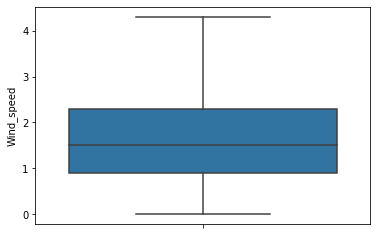

In [51]:

sns.boxplot(y = dataset['Wind_speed'])
plt.show()

In [52]:
print(dataset['Wind_speed'][82:90]) # cross checking values replaced

82    4.3
83    4.1
84    4.3
85    4.3
86    4.3
87    4.3
88    4.3
89    4.3
Name: Wind_speed, dtype: float64


In [53]:
sample_outliers = detect_outliers_iqr(dataset['Solar_Radiation']) # calling function to check outliers
print("Outliers from IQR method: ", sample_outliers)

lwr_bound: -1.395
upper_bound 2.325
5th and 98th percentile: 0.0 2.96
Outliers from IQR method:  [4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.4, 5.4, 5.4, 5.6, 5.6, 5.7, 5.8, 5.8, 5.8, 5.8, 6.0, 6.0, 6.1, 6.7, 6.9, 7.2, 7.3, 7.4, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.34, 2.34, 2.34, 2.34, 2.34, 2

In [54]:
# Computing 5th, 90th percentiles and replacing the outliers
def Outliers_imputing(lp,up,data):
  fifth_percentile = np.percentile(data,lp)              #calculating lower percentile
  ninetyfifth_percentile = np.percentile(data,up)        #calculating greater percentile
  print("5th and 98th percentile:",fifth_percentile, ninetyfifth_percentile)
  #b = np.where(dataset['Wind_speed']>ninetyfifth_percentile)
  q1 = np.percentile(data, 25)                           #calculating 25th percentile
  q3 = np.percentile(data,75)                            #calculating 75th percentile
  # print(q1, q3)
  IQR = q3-q1                                           #calculating inter quartile range
  lwr_bound = q1-(1.5*IQR)                              #calculating lower bound
  print( "Lower_bound:",lwr_bound )
  upr_bound = q3+(1.5*IQR)                                #calculating upper  bound
  print("Upper_bound:",upr_bound )
  #print(dataset['Wind_speed'][82:90])
  b=np.where(data >upr_bound)                          #Finding outliers place
  print(b)
  b=np.where(data <lwr_bound)                           #Finding outliers index
  print(b)
  data.mask(data >upr_bound, ninetyfifth_percentile, inplace=True)   #repalcing outliers
  data.mask(data <lwr_bound,fifth_percentile, inplace=True)          #repalcing outliers
  #print(dataset['Wind_speed'][82:90])
  return data

In [64]:
outr=Outliers_imputing(5,95,dataset['Solar_Radiation'])  # calling function to replace outliers
outr

5th and 98th percentile: 0.0 2.27
Lower_bound: -1.395
Upper_bound: 2.325
(array([], dtype=int64),)
(array([], dtype=int64),)


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8755    0.0
8756    0.0
8757    0.0
8758    0.0
8759    0.0
Name: Solar_Radiation, Length: 8760, dtype: float64

In [65]:
dataset['Solar_Radiation'].loc[1741]      

2.27

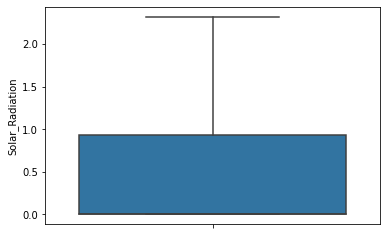

In [66]:
sns.boxplot(y = dataset['Solar_Radiation'])
plt.show()

In [67]:
sample_outliers = detect_outliers_iqr(dataset['Rented_Bike_Count'])  # calling function to check outliers
print("Outliers from IQR method: ", sample_outliers)

lwr_bound: -1120.375
upper_bound 2376.625
5th and 98th percentile: 22.0 2355.0
Outliers from IQR method:  [4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.4, 5.4, 5.4, 5.6, 5.6, 5.7, 5.8, 5.8, 5.8, 5.8, 6.0, 6.0, 6.1, 6.7, 6.9, 7.2, 7.3, 7.4, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.34, 2.34, 2.34, 2.34

In [68]:
outr=Outliers_imputing(5,98,dataset['Rented_Bike_Count']) # calling function to replace outliers
outr

5th and 98th percentile: 22.0 2355.0
Lower_bound: -1120.375
Upper_bound: 2376.625
(array([2946, 2994, 3114, 3210, 3282, 3498, 3522, 3546, 3618, 3714, 3785,
       3834, 3835, 3882, 3928, 3929, 3954, 3978, 4072, 4074, 4098, 4122,
       4123, 4170, 4171, 4194, 4218, 4290, 4291, 4338, 4339, 4362, 4363,
       4386, 4387, 4435, 4436, 4458, 4459, 4460, 4461, 4482, 4483, 4485,
       4530, 4531, 4554, 4555, 4556, 4601, 4640, 4650, 4651, 4652, 4653,
       4672, 4673, 4674, 4675, 4698, 4721, 4722, 4723, 4724, 4745, 4746,
       4747, 4748, 4749, 4770, 4771, 4772, 4796, 4808, 4818, 4819, 4820,
       4821, 4832, 4842, 4843, 4844, 4866, 4867, 4868, 4869, 4890, 4891,
       4892, 4940, 4962, 4963, 4964, 5010, 5011, 5058, 5059, 5154, 5155,
       5156, 5178, 5179, 5180, 5202, 5226, 5227, 5346, 5370, 5394, 5466,
       5490, 5514, 5538, 5562, 5634, 5682, 6210, 6234, 6306, 6330, 6354,
       6570, 6666, 6667, 6690, 6691, 6714, 6738, 6810, 6811, 6834, 6835,
       6848, 6858, 6859, 6882, 6906, 6978

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented_Bike_Count, Length: 8760, dtype: int64

In [69]:
dataset['Rented_Bike_Count'][2946]

2355

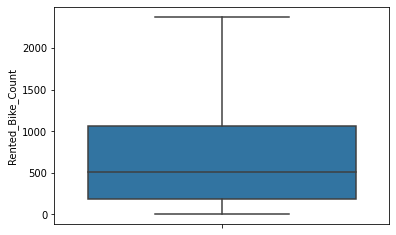

In [71]:
sns.boxplot(y = dataset['Rented_Bike_Count']) # checking outliers after replacement
plt.show()

In [72]:
#'Rainfall',
#'Snowfall'
sample_outliers = detect_outliers_iqr(dataset['Rainfall']) # calling function to check outliers with iqr method
print("Outliers from IQR method: ", sample_outliers)

lwr_bound: 0.0
upper_bound 0.0
5th and 98th percentile: 0.0 2.0
Outliers from IQR method:  [4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.4, 5.4, 5.4, 5.6, 5.6, 5.7, 5.8, 5.8, 5.8, 5.8, 6.0, 6.0, 6.1, 6.7, 6.9, 7.2, 7.3, 7.4, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.34, 2.34, 2.34, 2.34, 2.34, 2.34, 2

In [73]:
sample_outliers = detect_outliers_iqr(dataset['Snowfall'])
print("Outliers from IQR method: ", sample_outliers)

lwr_bound: 0.0
upper_bound 0.0
5th and 98th percentile: 0.0 1.3
Outliers from IQR method:  [4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.4, 5.4, 5.4, 5.6, 5.6, 5.7, 5.8, 5.8, 5.8, 5.8, 6.0, 6.0, 6.1, 6.7, 6.9, 7.2, 7.3, 7.4, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.34, 2.34, 2.34, 2.34, 2.34, 2.34, 2

In [74]:
dataset.isna().sum()

Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_Day      0
month                0
weekday_weekend      0
dtype: int64

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekday_weekend    8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


**From above box plot we conclude that outliers are found in Rented_Bike_Count, Wind_speed, in snowfall and rainfall.**

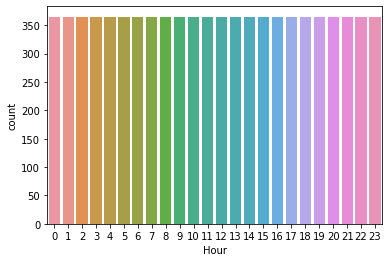

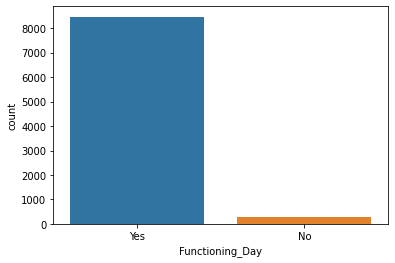

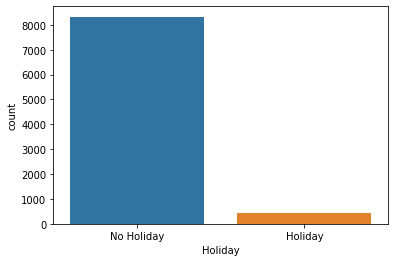

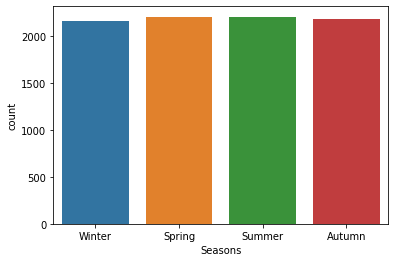

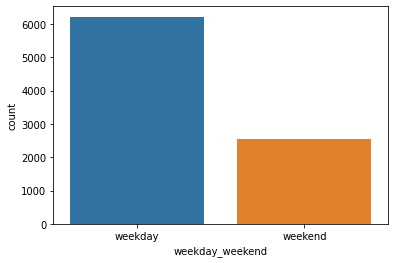

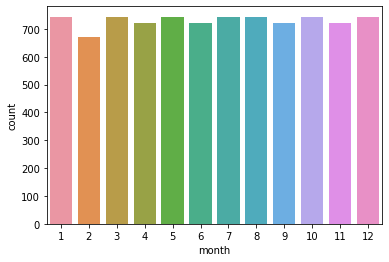

In [76]:
# bar plot for categorical features
for catf in cat_features :
    sns.countplot(x = dataset[catf],)
    plt.show()

###**Bivariate Analysis :**

In [77]:
dataset.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning_Day', 'month', 'weekday_weekend'],
      dtype='object')

[Text(0.5, 1.0, 'Count of Rented bikes based on hour ')]

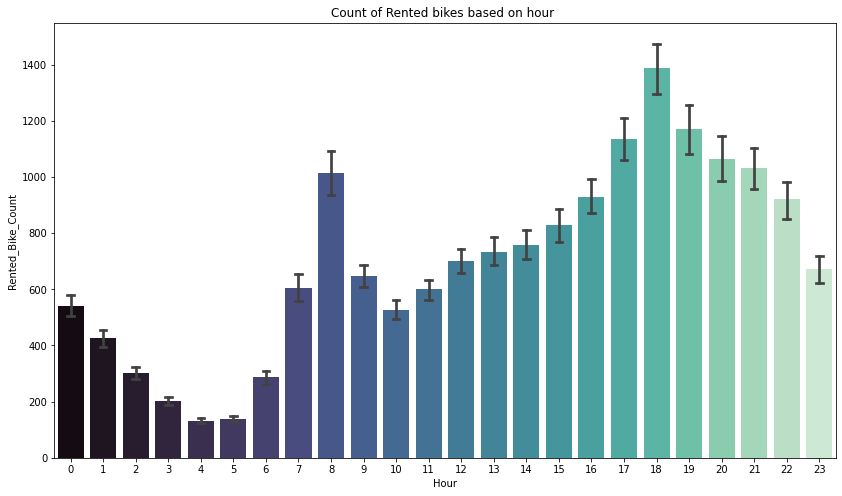

In [78]:
#anlysis of data by vizualisation using hour and rented bike count.
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=dataset,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on hour ')

**From above bar plot we conclude that People generally use rented bikes in morning from 7am to 9am and at evening time 5pm to 8pm.**

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

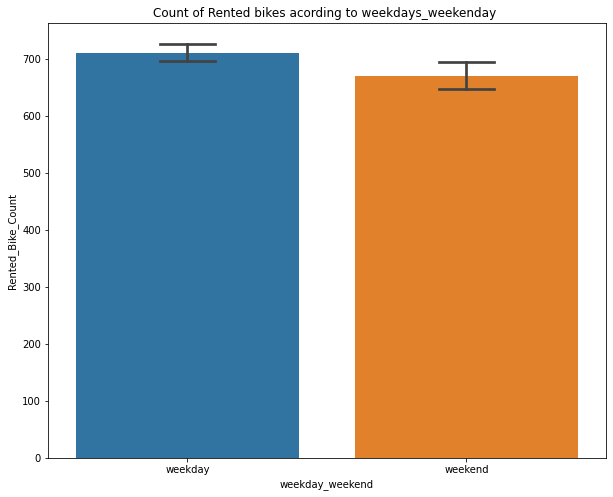

In [79]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=dataset,x='weekday_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

**Weekday has maximum bike count than weekend from above plot we conclude.**

[Text(0.5, 1.0, 'Count of Rented bikes based on weekdays_weekend ')]

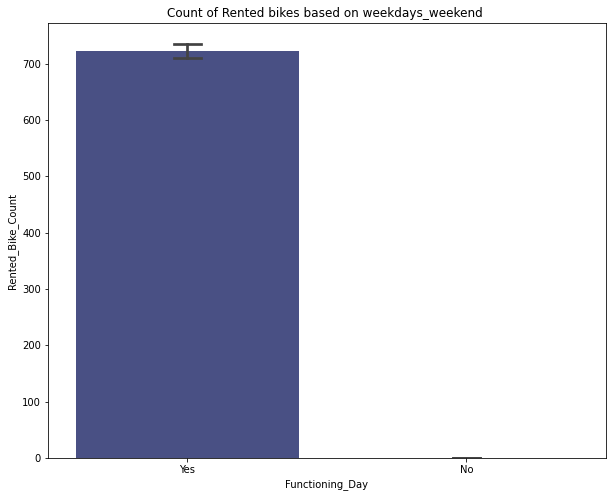

In [82]:
#anlysis of data by vizualisation using weekdays-weekend and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=dataset,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.1,palette = "mako")
ax.set(title='Count of Rented bikes based on weekdays_weekend ')

**People use rented bike only in functioning day**

[Text(0.5, 1.0, 'Count of Rented bikes based on  Holiday ')]

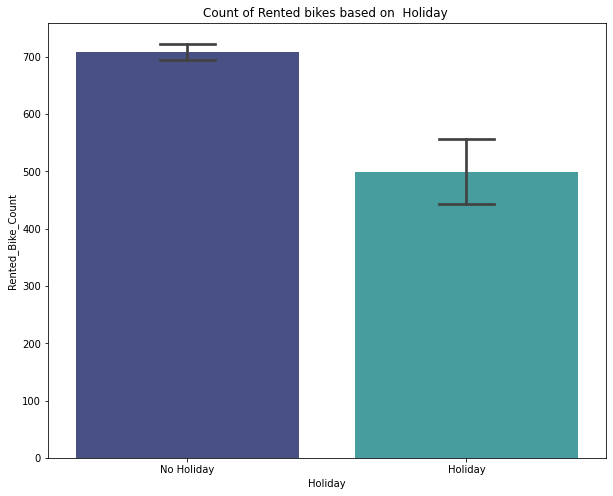

In [83]:
#anlysis of data by vizualisation using holiday and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=dataset,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on  Holiday ')

**Use of rented bike is more on 'No holiday' means on working days as compare to 'Holiday'.**

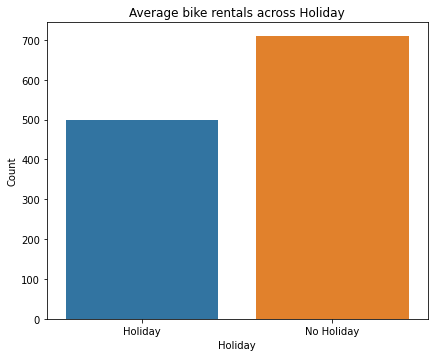

In [84]:
# Average values across each of the categorical columns 
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 4)
group_season = pd.DataFrame(dataset.groupby(['Holiday'])['Rented_Bike_Count'].mean()).reset_index()
sns.barplot(data=group_season, x='Holiday', y='Rented_Bike_Count', ax=axes)
axes.set(xlabel='Holiday', ylabel='Count', title='Average bike rentals across Holiday')
plt.show()

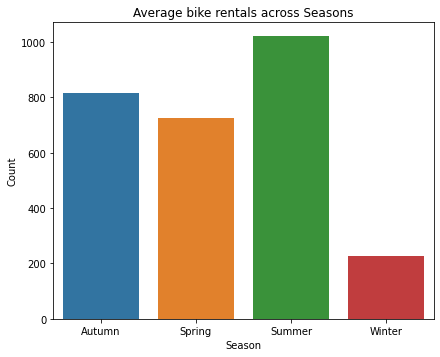

In [85]:
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 2)
group_season = pd.DataFrame(dataset.groupby(['Seasons'])['Rented_Bike_Count'].mean()).reset_index()
sns.barplot(data=group_season, x='Seasons', y='Rented_Bike_Count', ax=axes)
axes.set(xlabel='Season', ylabel='Count', title='Average bike rentals across Seasons')
plt.show()

**Finding Correlation between dependent and independant variables**

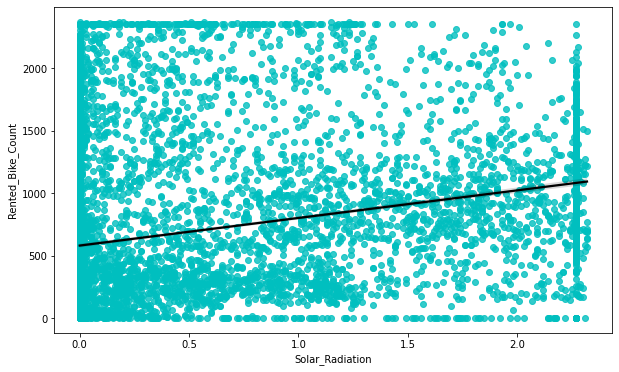

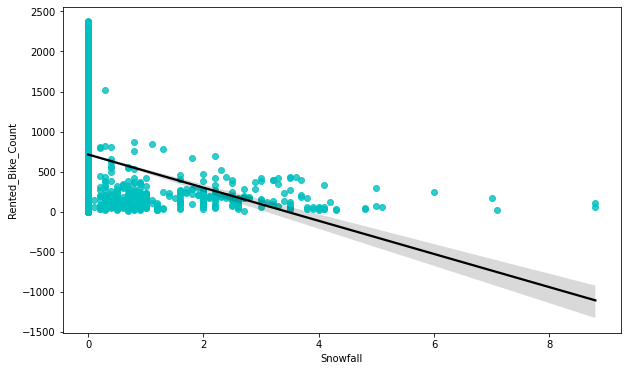

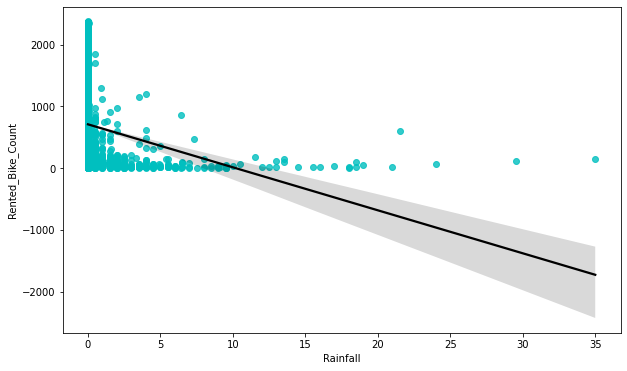

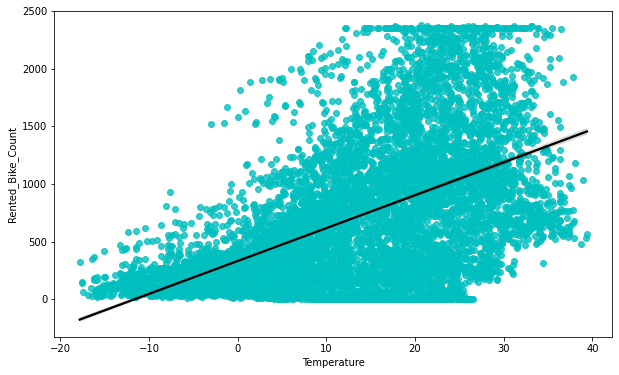

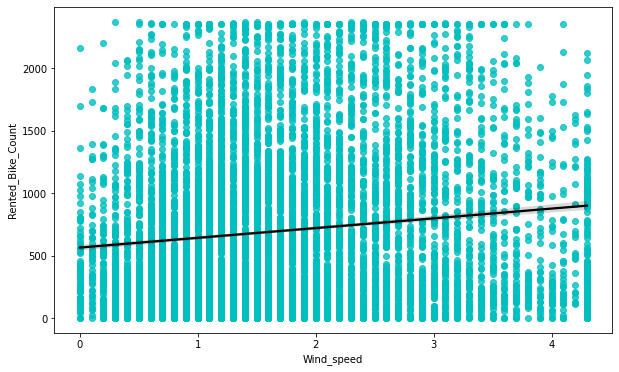

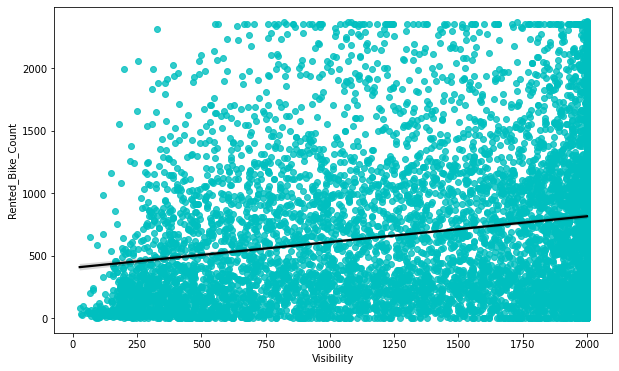

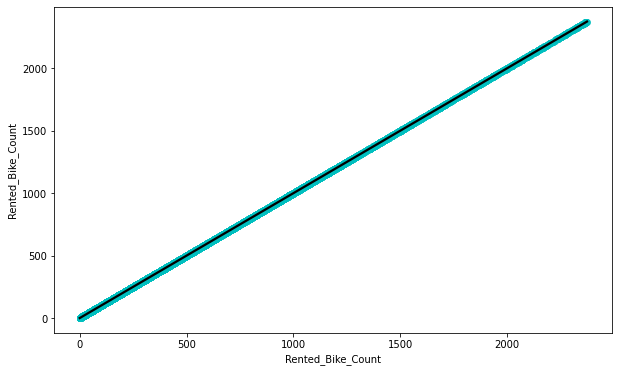

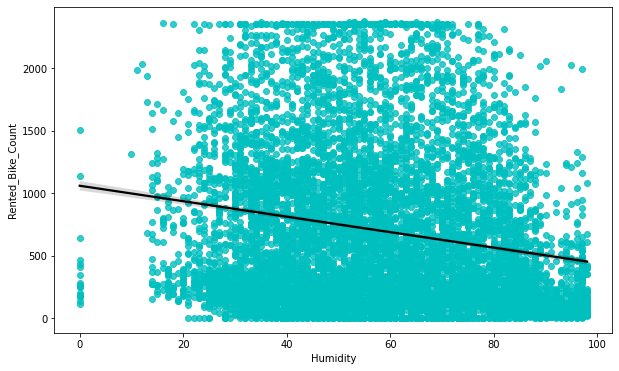

In [86]:
#plotting the regression plot for all the numerical features
for fet in num_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=dataset[fet],y=dataset['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})

**Observations:**


*  The columns 'Hour','Temperature', 'Wind_speed','Visibility', and 'Solar_Radiation' are positively related to the dependent variable. Which means that the rented bike count increases with increase of these features.


*  Whereas, the colums 'Rainfall','Snowfall','Humidity' are those features which are negatively related with the dependent variable, which implies that the rented bike count decreases when these features increases.


In [87]:
# creating a dataframe containing the count of bikes rented in different temperature

dataset_temp = pd.DataFrame(dataset.groupby('Temperature')['Rented_Bike_Count'].sum())
dataset_temp.reset_index(inplace=True)
dataset_temp

,Temperature,Rented_Bike_Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96
...,...,...
541,38.0,1184
542,38.7,475
543,39.0,1033
544,39.3,531


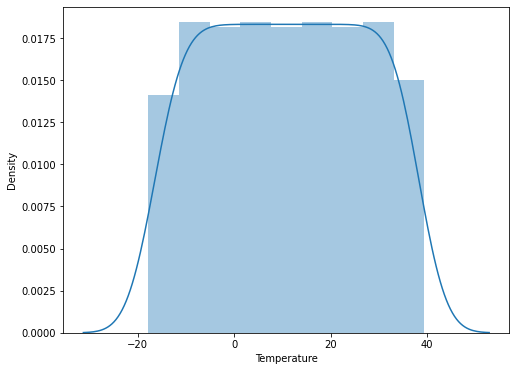

In [88]:
# plot showing distribution of bike rentals according to temperature intensity

plt.figure(figsize=(8,6))
sns.distplot(dataset_temp['Temperature'])

**Above plot shows that people tend to rent bikes when the temperature is between -5 to 25 degrees.**

In [89]:
# creating a dataframe containing the count of bikes rented in differant visibility ranges

dataset_visi = pd.DataFrame(dataset.groupby('Visibility')['Rented_Bike_Count'].sum())
dataset_visi.reset_index(inplace=True)

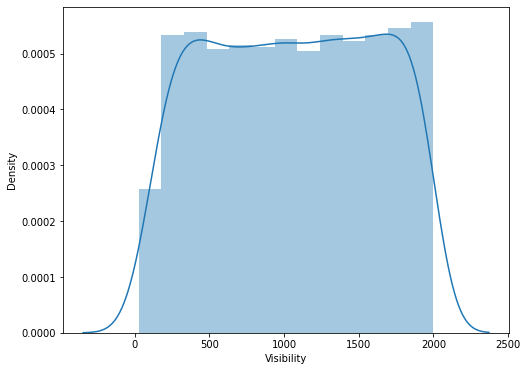

In [90]:
plt.figure(figsize=(8,6))
sns.distplot(dataset_visi['Visibility'])

In [91]:
dataset.isna().sum()

Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility           0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Seasons              0
Holiday              0
Functioning_Day      0
month                0
weekday_weekend      0
dtype: int64

In [92]:
dataset=dataset.drop('month',axis=1)

**Above plot shows that people tend to rent bikes when the visibility is between 300 to 1700.**

In [97]:
# Using Pandas get Dummies for Encoding categorical features
dataset1 = pd.get_dummies(dataset,drop_first=True,sparse=True)
dataset1.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes,weekday_weekend_weekend
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,1,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,1,1,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,1,1,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,1,1,0


In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  weekday_weekend    8760 non-null   category
dtypes: category(2), float64(5), int64(3), object(3)
memory usage: 770.9+ KB


In [98]:
dataset.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,weekday_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,weekday
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,weekday
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,weekday
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,weekday
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,weekday


In [99]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  weekday_weekend    8760 non-null   category
dtypes: category(2), float64(5), int64(3), object(3)
memory usage: 770.9+ KB


In [100]:
# function to calculate Multicollinearity

# checking the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
dataset_m=dataset[num_features]

  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = num_features
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataset_m.values, i) for i in range(len(num_features))]
vif_data['VIF'] = round(vif_data['VIF'],2)


print(vif_data)

             feature   VIF
0    Solar_Radiation  2.33
1           Snowfall  1.12
2           Rainfall  1.10
3        Temperature  4.41
4         Wind_speed  4.42
5         Visibility  4.76
6  Rented_Bike_Count  3.55
7           Humidity  4.84


###**Normalising Rented_Bike_Count Column Data.**


####Observations:


*  Rented Bike Count has moderate skewness toward right. And, we already know that the assumption of linear regression tells us that the distribution of dependent variable has to be normal, hence we should perform some operation to make it normal.


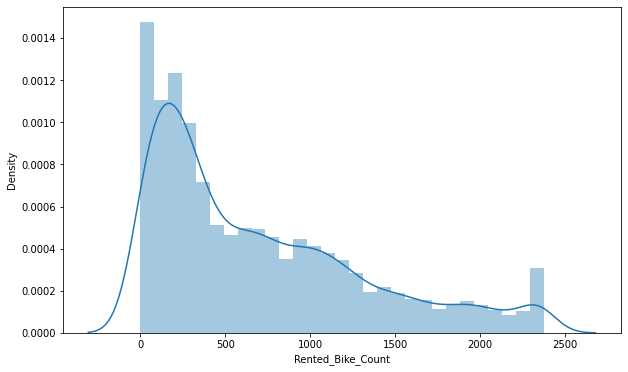

In [102]:
plt.figure(figsize=(10,6))
sns.distplot((dataset1['Rented_Bike_Count']))  # distribution plot creation

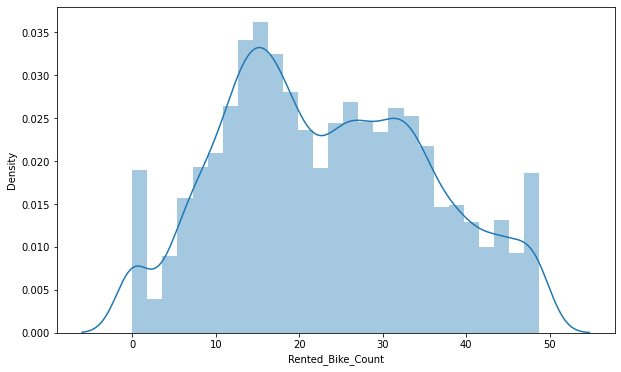

In [103]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(dataset1['Rented_Bike_Count']))

**Model Training**

**Separating dependant and independant variables**

In [104]:
# Data spliting and value assigning to variables for Reggression

X = dataset1.drop(columns = ['Rented_Bike_Count'] , axis = 1)
y = np.sqrt(dataset1['Rented_Bike_Count'])

In [105]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes,weekday_weekend_weekend
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,1,1,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,1,1,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,1,0


In [106]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [107]:
dataset1.isna().sum()

Rented_Bike_Count          0
Temperature                0
Humidity                   0
Wind_speed                 0
Visibility                 0
Solar_Radiation            0
Rainfall                   0
Snowfall                   0
Hour_1                     0
Hour_2                     0
Hour_3                     0
Hour_4                     0
Hour_5                     0
Hour_6                     0
Hour_7                     0
Hour_8                     0
Hour_9                     0
Hour_10                    0
Hour_11                    0
Hour_12                    0
Hour_13                    0
Hour_14                    0
Hour_15                    0
Hour_16                    0
Hour_17                    0
Hour_18                    0
Hour_19                    0
Hour_20                    0
Hour_21                    0
Hour_22                    0
Hour_23                    0
Seasons_Spring             0
Seasons_Summer             0
Seasons_Winter             0
Holiday_No Hol

# **Implementing Linear Regression.**

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.25, random_state = 0)
print(X_train.shape)
X_test.shape


(6570, 36)


(2190, 36)

In [109]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [110]:
# initalizing the model
regg = LinearRegression().fit(X_train_std ,y_train)

In [111]:
# Checking score
regg.score(X_train_std,y_train)

0.747452672263483

In [112]:
#Checking Coefficent
regg.coef_

array([ 5.04720636, -2.70607411, -0.15893136,  0.10859771,  1.35863449,
       -1.6975376 , -0.01812081, -0.41139089, -1.04312208, -1.49201251,
       -1.9041032 , -1.79414822, -0.85537084,  0.38920479,  1.38414548,
        0.08709826, -0.82324488, -0.85682952, -0.70605296, -0.73367083,
       -0.76972554, -0.49408458, -0.06219245,  0.74843237,  1.78276304,
        1.40532668,  1.23523379,  1.30969154,  1.03991756,  0.28930582,
       -1.36537014, -1.2689404 , -3.40131096,  0.65469491,  4.83286736,
       -0.31094134])

In [113]:
# Predicted Train & Test values
 
y_pred_train = regg.predict(X_train_std)
y_pred_test = regg.predict(X_test_std)

In [114]:
y_pred_test[:6]

array([13.91805179, 23.46742096, 18.52595471, 16.63569278, 34.47972199,
       20.54452666])

In [115]:
y_test[:6]

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
2182    13.784049
Name: Rented_Bike_Count, dtype: float64

In [116]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 38.056067709228024
RMSE : 6.168960018449465
MAE : 4.697236679853178
R2 : 0.747452672263483
Adjusted R2 : 0.7432298651113629


In [117]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [118]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 36.337992220071555
RMSE : 6.028100216492055
MAE : 4.633982398489036
R2 : 0.7645849092392234
Adjusted R2 : 0.760648567730915


In [119]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

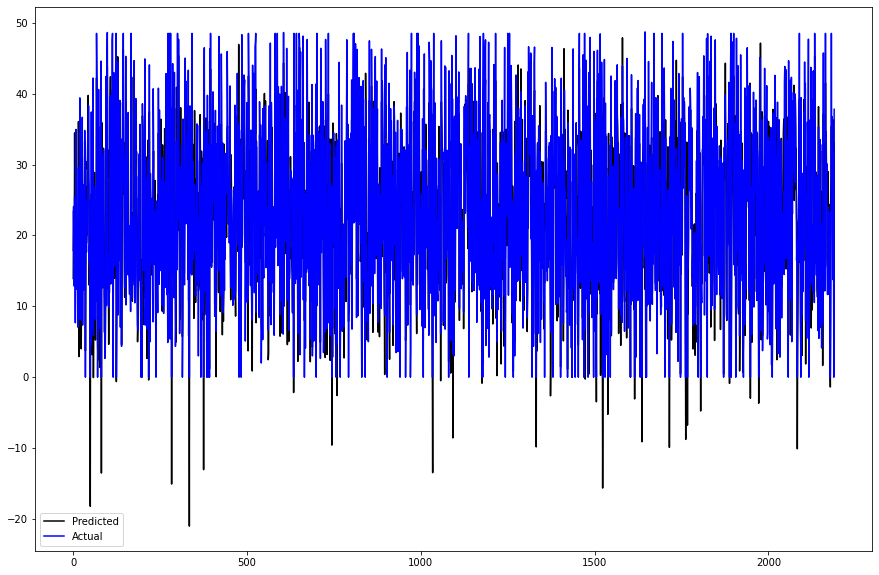

In [120]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test, color='k')
plt.plot(np.array(y_test), color='b')
plt.legend(["Predicted","Actual"])
plt.show()

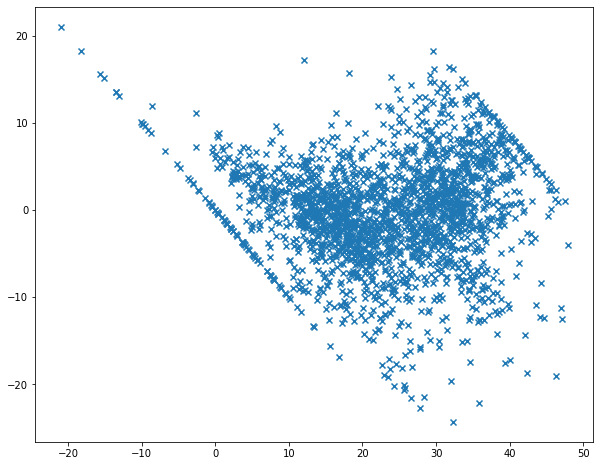

In [121]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test),(y_test)-(y_pred_test),marker='x')

# **Implementing Lasso regression** (L1 Regularization)

In [122]:
# Initalizing lasso regression
lasso = Lasso(alpha = 1, max_iter= 1000)
lasso.fit(X_train_std, y_train)

# Creating the model score
print(lasso.score(X_test_std, y_test))
print(lasso.score(X_train_std, y_train))


0.6377300196011472
0.6244266442436747


In [123]:
# Predicted Train & Test values
y_pred_train_lasso=lasso.predict(X_train_std)
y_pred_test_lasso=lasso.predict(X_test_std)

In [124]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 56.594719035619526
RMSE : 7.522946167268481
MAE : 5.88359479927799
R2 : 0.6244266442436747
Adjusted R2 : 0.6181467367623799


In [125]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [126]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 55.918945921254085
RMSE : 7.477897159045054
MAE : 5.884523209401161
R2 : 0.6377300196011472
Adjusted R2 : 0.6316725559251795


In [127]:
dict2={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

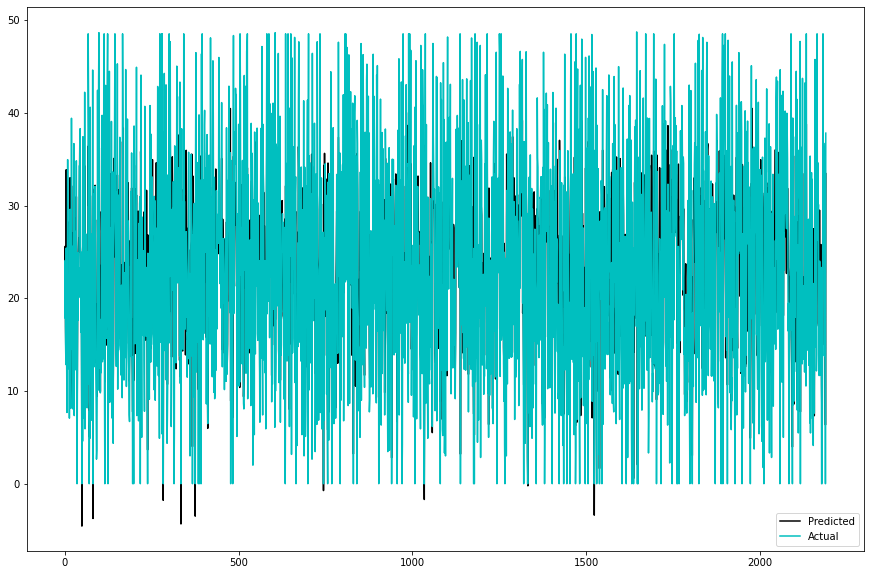

In [128]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_lasso, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

# **Implementing Ridge regression** (L2 Regularization)

In [129]:
# Initalizing ridge regression
ridge = Ridge(alpha = 0.1)

ridge.fit(X_train_std,y_train)

Ridge(alpha=0.1)

In [130]:
#checking score
ridge.score(X_train_std,y_train)

0.7474526719377701

In [131]:
# Predicted Train & Test values
y_pred_train_ridge=ridge.predict(X_train_std)
y_pred_test_ridge=ridge.predict(X_test_std)

In [132]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 38.05606775830934
RMSE : 6.168960022427552
MAE : 4.6972418343990485
R2 : 0.7474526719377701
Adjusted R2 : 0.7432298647802038


In [133]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [134]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 36.33807692664047
RMSE : 6.028107242463464
MAE : 4.633994990543448
R2 : 0.7645843604690963
Adjusted R2 : 0.7606480097848825


In [135]:
dict2={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

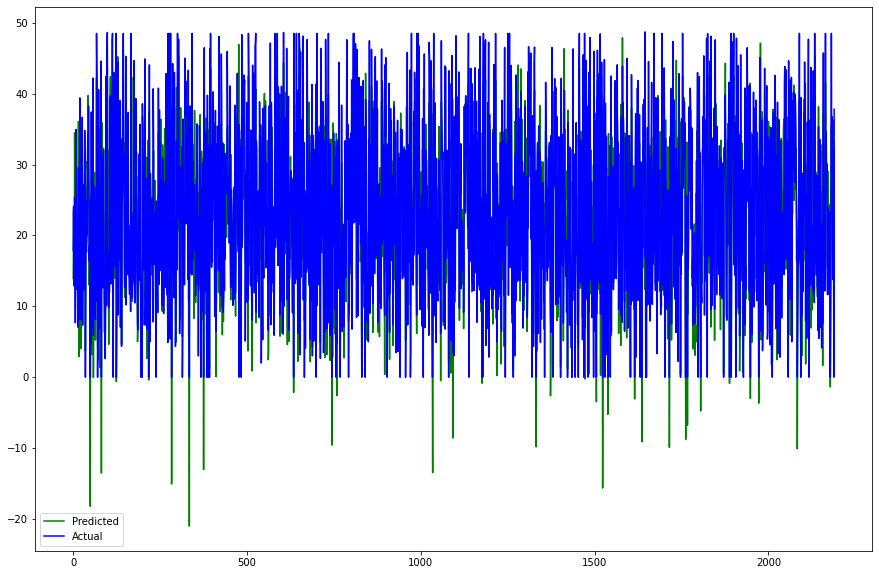

In [136]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_ridge, color='g')
plt.plot(np.array(y_test), color='b')
plt.legend(["Predicted","Actual"])
plt.show()

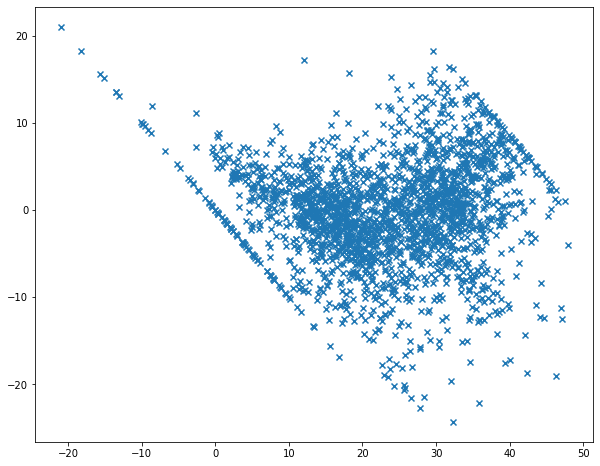

In [137]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge),marker='x')

In [138]:
# Initializing model
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [139]:
elasnet.fit(X_train_std,y_train)

ElasticNet(alpha=0.1)

In [140]:
#checking score
elasnet.score(X_train_std, y_train)

0.7424646472553152

In [141]:
# Train Test values
y_pred_train_en=elasnet.predict(X_train_std)
y_pred_test_en=elasnet.predict(X_test_std)

In [142]:
# Calculating Performance Metrics for Train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_en))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_en))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_en))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 38.807707487591465
RMSE : 6.22958325151783
MAE : 4.766523158512878
R2 : 0.7424646472553152
Adjusted R2 : 0.7381584360621853


In [143]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Elasticnet regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [144]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_en))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_en))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_en))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37.38775813284883
RMSE : 6.11455297898782
MAE : 4.7294323983475826
R2 : 0.7577840178708355
Adjusted R2 : 0.75373395964666


In [145]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Elasticnet regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

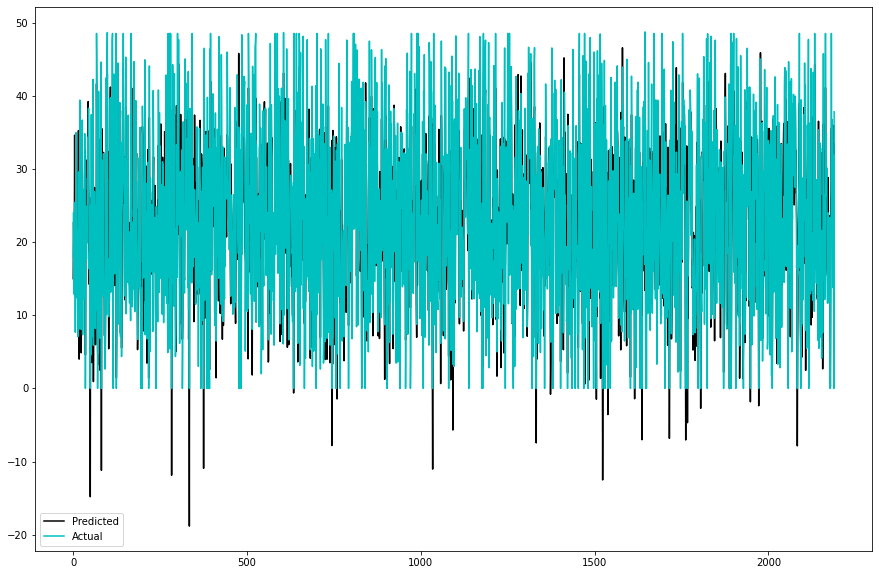

In [146]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en), color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

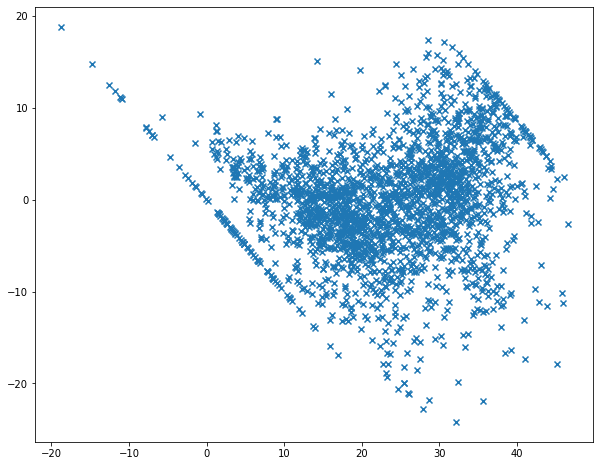

In [147]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en),marker='x')

# **Implementing Decision Tree Regression**

In [148]:
#Initilazing the model
dt_regr = DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9, max_leaf_nodes=100)

In [149]:
dt_regr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [150]:
#Train Test values
y_pred_train_d = dt_regr.predict(X_train)
y_pred_test_d = dt_regr.predict(X_test)

In [151]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 39.92843326440237
RMSE : 6.318894940130146
MAE : 4.631317097106323
R2 : 0.7350272971270361
Adjusted R2 : 0.7305967270836424


In [152]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [153]:
# Calculating Performance Metrics for Train data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 44.5013932745001
RMSE : 6.670936461584693
MAE : 4.782567693305939
R2 : 0.7116984484654385
Adjusted R2 : 0.7068778001350882


In [154]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

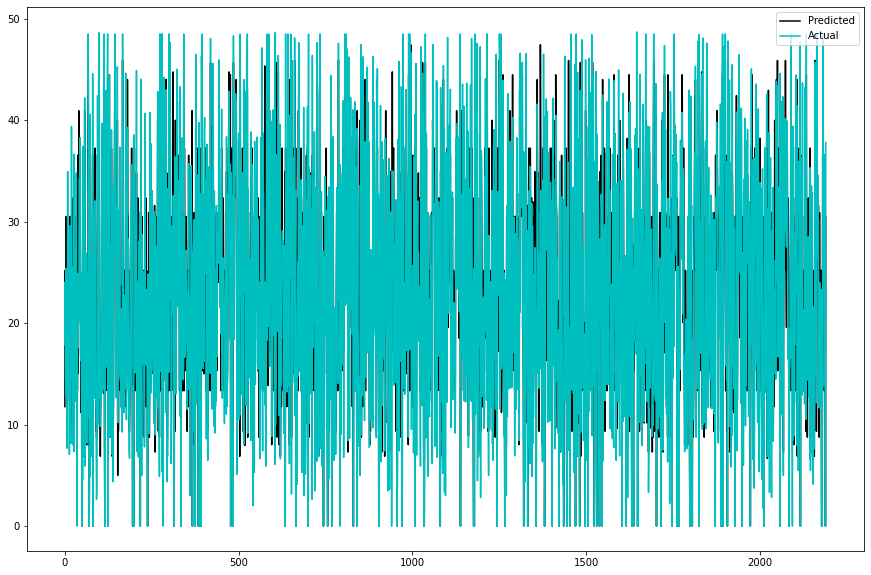

In [155]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_d, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

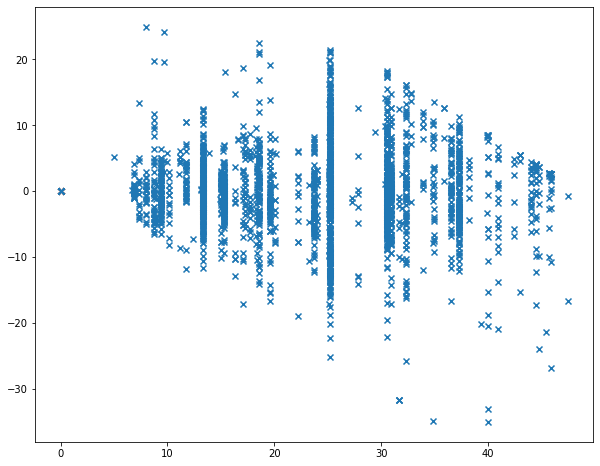

In [156]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d),marker='x')

# **Implementng Random Forest Regression** 

In [157]:
# Initalizing the Model
rf_model = RandomForestRegressor()

In [158]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [159]:
#Train test values
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [160]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 2.105341395981609
RMSE : 1.450979460909633
MAE : 0.9663768400476755
R2 : 0.9860285527240825
Adjusted R2 : 0.9857949381853305


In [161]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [162]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 15.864124678635646
RMSE : 3.982979372107725
MAE : 2.5916043228219263
R2 : 0.8972245266484915
Adjusted R2 : 0.8955060328999294


In [163]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [164]:
# Feature importances
rf_model.feature_importances_

array([3.22765728e-01, 1.64247616e-01, 1.59723298e-02, 1.64231763e-02,
       3.90065585e-02, 3.39483394e-02, 1.32365137e-03, 4.42053104e-03,
       1.20748534e-02, 1.84898316e-02, 2.62690657e-02, 2.32406598e-02,
       7.92372408e-03, 3.86205446e-03, 1.39302110e-02, 1.07340911e-03,
       2.40571722e-03, 1.06384244e-03, 2.56428515e-04, 2.63713351e-04,
       4.50740540e-04, 1.56657805e-03, 3.92478138e-03, 1.03742108e-02,
       2.21044151e-02, 1.69115287e-02, 1.41602765e-02, 1.51525027e-02,
       1.27215428e-02, 5.33012754e-03, 7.90510111e-03, 1.82320333e-03,
       1.10280761e-02, 3.29959640e-03, 1.54741441e-01, 9.54443668e-03])

In [165]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [166]:
plt.style.use('dark_background')

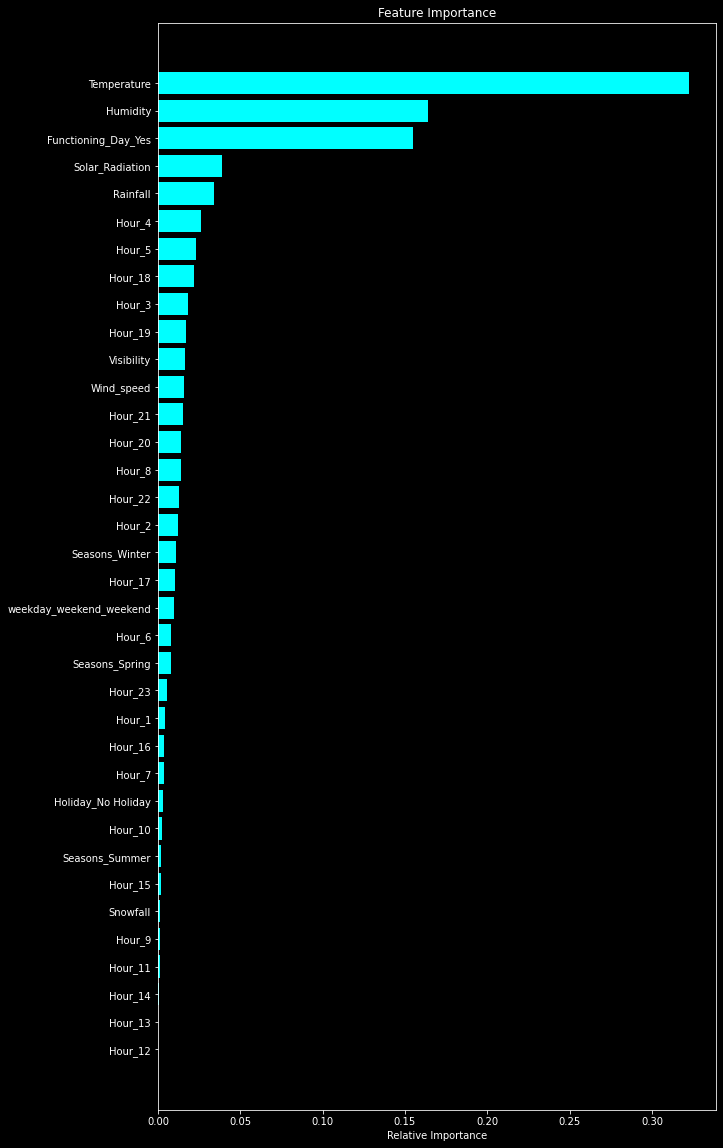

In [167]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Implementing XG Boost Regression**

In [168]:
# Using Pandas get Dummies for Encoding categorical features
dataset2 = pd.get_dummies(dataset,drop_first=True,sparse=False) 


In [169]:
x = dataset2.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(dataset2 ['Rented_Bike_Count'])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

In [170]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype           
---  ------                   --------------  -----           
 0   Rented_Bike_Count        8760 non-null   int64           
 1   Temperature              8760 non-null   float64         
 2   Humidity                 8760 non-null   int64           
 3   Wind_speed               8760 non-null   float64         
 4   Visibility               8760 non-null   int64           
 5   Solar_Radiation          8760 non-null   float64         
 6   Rainfall                 8760 non-null   float64         
 7   Snowfall                 8760 non-null   float64         
 8   Hour_1                   8760 non-null   Sparse[uint8, 0]
 9   Hour_2                   8760 non-null   Sparse[uint8, 0]
 10  Hour_3                   8760 non-null   Sparse[uint8, 0]
 11  Hour_4                   8760 non-null   Sparse[uint8, 0]
 12  Hour_5

In [171]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented_Bike_Count        8760 non-null   int64  
 1   Temperature              8760 non-null   float64
 2   Humidity                 8760 non-null   int64  
 3   Wind_speed               8760 non-null   float64
 4   Visibility               8760 non-null   int64  
 5   Solar_Radiation          8760 non-null   float64
 6   Rainfall                 8760 non-null   float64
 7   Snowfall                 8760 non-null   float64
 8   Hour_1                   8760 non-null   uint8  
 9   Hour_2                   8760 non-null   uint8  
 10  Hour_3                   8760 non-null   uint8  
 11  Hour_4                   8760 non-null   uint8  
 12  Hour_5                   8760 non-null   uint8  
 13  Hour_6                   8760 non-null   uint8  
 14  Hour_7                  

In [172]:
# Initializing the model
xgb_r = XGBRegressor()

In [173]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  weekday_weekend    8760 non-null   category
dtypes: category(2), float64(5), int64(3), object(3)
memory usage: 770.9+ KB


In [174]:
#Fitting the model
xgb_r.fit(x_train, y_train)

[03:21:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [175]:
#Train Test values
y_pred_train_xgb1 = xgb_r.predict(x_train)
y_pred_test_xgb1 = xgb_r.predict(x_test)

In [176]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xgb1))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xgb1))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xgb1))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xgb1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 20.70357831900214
RMSE : 4.550118495050667
MAE : 3.428443079623844
R2 : 0.8628787922990829
Adjusted R2 : 0.8605860085195971


In [177]:
dict1={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [178]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xgb1))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xgb1))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xgb1))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xgb1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 23.051818353426057
RMSE : 4.8012309206521255
MAE : 3.60018762070625
R2 : 0.8502904108960194
Adjusted R2 : 0.8477871386211735


In [179]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [180]:
# Feature importances
xgb_r.feature_importances_

array([0.07147747, 0.05261022, 0.0013577 , 0.0027685 , 0.04531993,
       0.06089057, 0.00200674, 0.00666626, 0.02392453, 0.04088677,
       0.04821915, 0.04393946, 0.02573032, 0.00310946, 0.019494  ,
       0.        , 0.01343172, 0.0112684 , 0.        , 0.00050441,
       0.00186419, 0.        , 0.00649709, 0.02150735, 0.05160551,
       0.04359313, 0.0319313 , 0.0451719 , 0.04666583, 0.00762994,
       0.00632748, 0.00254231, 0.07814958, 0.00796929, 0.16578418,
       0.00915534], dtype=float32)

In [181]:
features = X_train.columns
importances = xgb_r.feature_importances_
indices = np.argsort(importances)

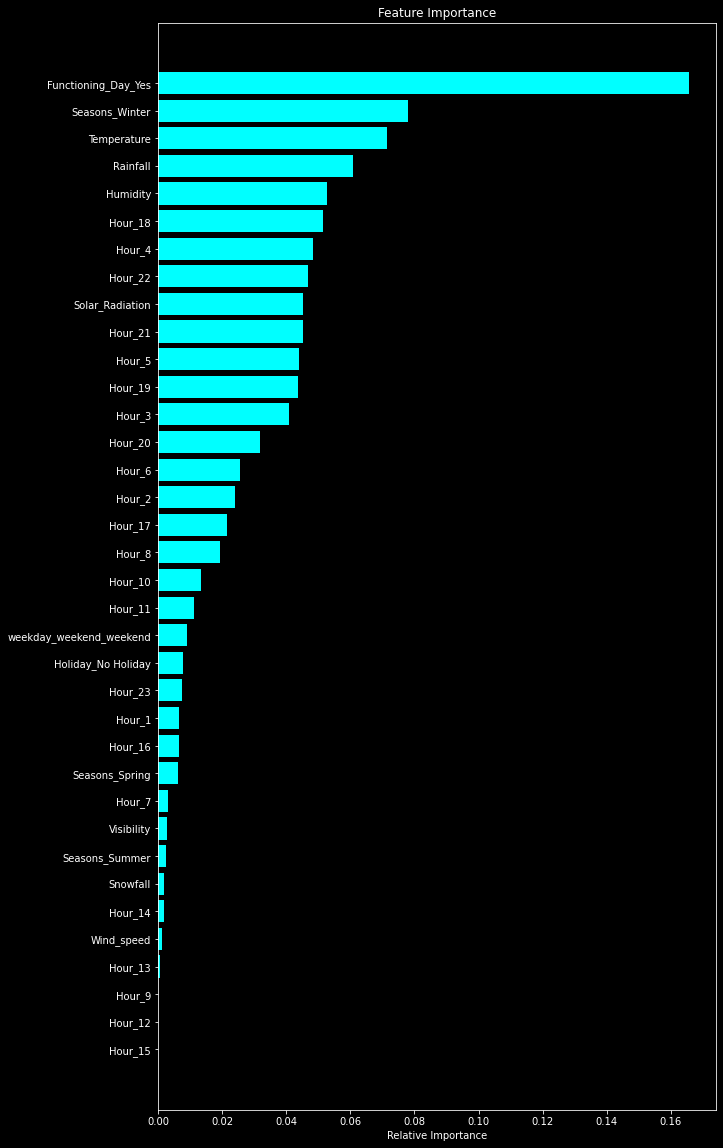

In [182]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**Hyperparameter tuning**
## ***For improvement of our model let's do some Hyper parameter tuning.***

## **XG boost Regressor with GridSearchCV**

In [183]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [184]:
parameter_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [185]:
# Create an instance of the XG Boost Regressor
xg_boost = XGBRegressor()

# Grid search
xg_grid = GridSearchCV(estimator=xg_boost,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

xg_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[03:22:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[03:22:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[03:22:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[03:22:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[03:22:08] WARNING: /works

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [186]:
xg_grid.best_estimator_


XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [187]:
xg_optimal_model = xg_grid.best_estimator_

In [188]:
xg_optimal_model.fit(x_train,y_train)

[03:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [189]:
#Train Test values
y_pred_train_xg_opt = xg_optimal_model.predict(x_train)
y_pred_test_xg_opt= xg_optimal_model.predict(x_test)

In [190]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xg_opt))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xg_opt))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xg_opt))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 4.768591028746433
RMSE : 2.1837103811509513
MAE : 1.4935234848504695
R2 : 0.9684172972025165
Adjusted R2 : 0.967889207420487


In [191]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'XG boost regg GridserachCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [192]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xg_opt))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xg_opt))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xg_opt))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 14.542307633345708
RMSE : 3.8134377710073766
MAE : 2.598753363774218
R2 : 0.9055552639261408
Adjusted R2 : 0.9039760672244879


In [193]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG boost regg GridserachCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [194]:
xg_optimal_model.feature_importances_

array([0.02051551, 0.01607488, 0.00126419, 0.00145041, 0.00713096,
       0.03444021, 0.00213658, 0.00708153, 0.04116999, 0.05206852,
       0.07571282, 0.07206409, 0.02999747, 0.00740691, 0.02703136,
       0.00347905, 0.01795454, 0.01477431, 0.00277573, 0.00138361,
       0.00113608, 0.00235119, 0.00749977, 0.03846445, 0.05184461,
       0.04598995, 0.05405695, 0.05237352, 0.03441778, 0.01341541,
       0.01010245, 0.00186695, 0.04891878, 0.00415129, 0.1930354 ,
       0.00446267], dtype=float32)

In [195]:
features = X_train.columns
importance = xg_optimal_model.feature_importances_
index = np.argsort(importance)

Text(0.5, 0, 'Relative Importance')

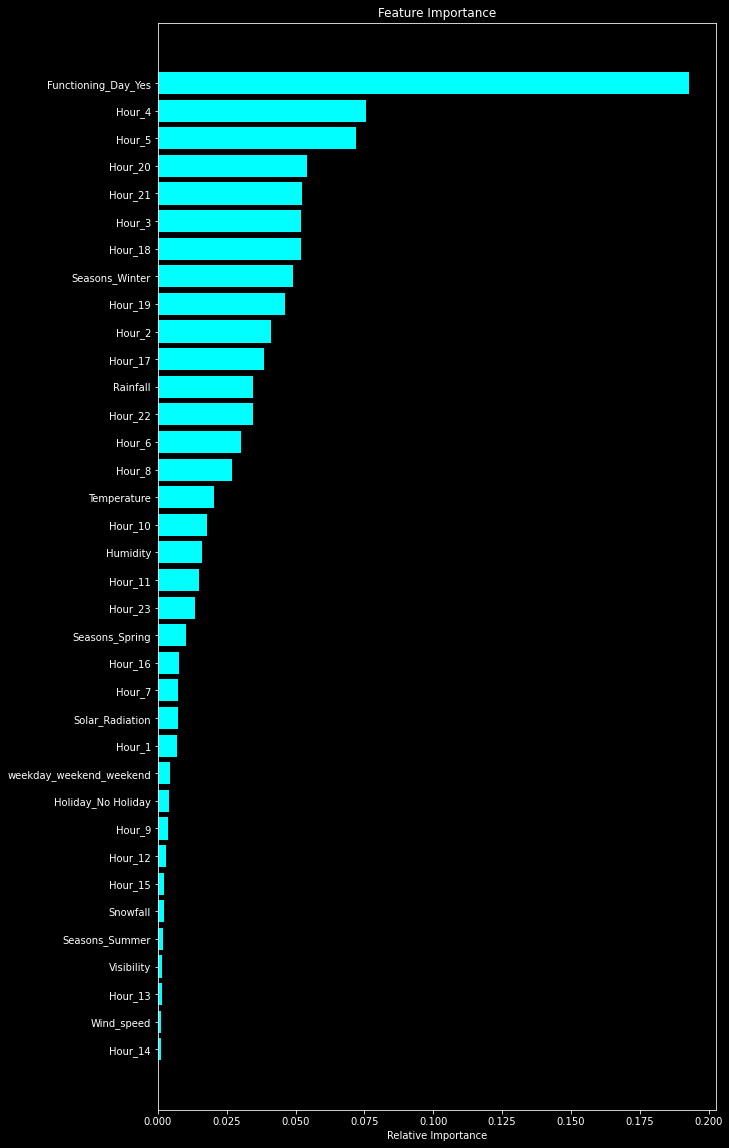

In [196]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(index)), importance[index], color='aqua', align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')

**In our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable i.e, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. we also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features and one hot encoded the categorical variables.**

**Next we implemented 7 machine learning algorithms Linear Regression, Lasso,Ridge,Elastic Net,Decision Tree, Random Forest, XGBoost and XGBoost with Grid Search CV. Did some hyperparameter tuning to improve our model performance.**

**Following are the results of our evaluation:** 

In [197]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE     R2  \
Training set 0          Linear regression   4.697  38.056  6.169  0.747   
             1            Lasso regression  5.884  56.595  7.523  0.624   
             2            Ridge regression  4.697  38.056  6.169  0.747   
             3       Elasticnet regression  4.767  38.808  6.230  0.742   
             4    Decision tree regression  4.631  39.928  6.319  0.735   
             5    Random forest regression  0.966   2.105  1.451  0.986   
             6         XG Boost Regression  3.428  20.704  4.550  0.863   
             7  XG boost regg GridserachCV  1.494   4.769  2.184  0.968   
Test set     0          Linear regression   4.634  36.338  6.028  0.765   
             1            Lasso regression  5.885  55.919  7.478  0.638   
             2            Ridge regression  4.634  36.338  6.028  0.765   
             3       Elasticnet regression  4.729  37.388  6.115  0.758   
             4    Decision tree regression  4.783  44.501  6.671  0.712   
             5    Random forest regression  2.592  15.864  3.983  0.897   
             6         XG Boost Regression  3.600  23.052  4.801  0.850   
             7  XG boost regg GridserachCV  2.599  14.542  3.813  0.906   

                Adj_R2  
Training set 0    0.74  
             1    0.62  
             2    0.74  
             3    0.74  
             4    0.73  
             5    0.99  
             6    0.86  
             7    0.97  
Test set     0    0.76  
             1    0.63  
             2    0.76  
             3    0.75  
             4    0.71  
             5    0.90  
             6    0.85  
             7    0.90

# **Final Observations:**

*    **Out of all above models Random forest Regressor gives the highest R2 score of 98% for Train Set and XG Boost Gridsearch CV gives the highest R2 score of 91% for Test set.**

*   **No overfitting is seen.**
*  **We can deploy XG Boost Gridsearch CV model.**


*   Hour of the day holds most importance among all the features for prediction of dataset
*   We observed that the highest number of bike rentals on a clear day and the lowest on a snowy or rainy day
*   As we can see the top 5 important features of our dataset are: Season_winter, Temperature, Hour, Humidity
*   Peoples dont use rented bikes in no functioning day.
*   people tend to rent bikes when the temperature is between -5 to 25 degrees.
*    people tend to rent bikes when the visibility is between 300 to 1700
*  for all the above experiments we can conclude that Random Forest  and XGBoost regressor with using hyperparameters we got the best results
